# Data Exploration & Cleaning
Data was taken from IPUMS CPS. The focus of this exploration lies on ethnicity/race.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
#pd.set_option('display.max_columns', None)

Set paths to all files used

In [3]:
#data_path = r'../../data/cps_ethnicity_asec.csv'
#data_path = r'../../data/cps_00003_income.csv'
data_path = r'../../data/cps_00004.csv'

occ_92_02_path = r'../../data/occ_92_02.csv'
occ_03_10_path = r'../../data/occ_03_10.csv'
occ_11_19_path =r'../../data/occ_11_19.csv'
occ_20_path =r'../../data/occ_20.csv'

occ2010_data_path = r'../../data/occ2010_codes.txt'
occ1950_data_path = r'../../data/occ1950_codes.txt'
race_occ_path = r'../../data/race_codes.txt'

Load the main data as a dataframe

In [4]:
data_df = pd.read_csv(data_path)
data_df.head()

,YEAR,SERIAL,MONTH,CPSID,ASECFLAG,HFLAG,ASECWTH,REGION,STATEFIP,STATECENSUS,...,OCCLY,OCC90LY,OCC10LY,QOCCLY,INCWAGE,MIGSTA1,WHYMOVE,MIGRATE1,UH_SUPREC_A1,UH_SUPREC_A2
0,1962,1,3,NaN,NaN,NaN,1494.99,11,61,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1962,2,3,NaN,NaN,NaN,1568.53,11,61,NaN,...,NaN,NaN,NaN,NaN,99999999,NaN,NaN,NaN,NaN,NaN
2,1962,3,3,NaN,NaN,NaN,6443.03,12,42,NaN,...,NaN,NaN,NaN,NaN,99999999,NaN,NaN,NaN,NaN,NaN
3,1962,4,3,NaN,NaN,NaN,1473.97,11,25,NaN,...,NaN,NaN,NaN,NaN,1692,NaN,NaN,NaN,NaN,NaN
4,1962,5,3,NaN,NaN,NaN,1538.21,11,25,NaN,...,NaN,NaN,NaN,NaN,1522,NaN,NaN,NaN,NaN,NaN


In [5]:
data_df.drop(['MONTH', 'HFLAG', 'ASECWTH', 'REGION', 'STATEFIP', 'STATECENSUS', 'ASECOVERH', 'CPSIDV', 'CPSIDP', 'LABFORCE', 'ASECOVERP', 'UH_SUPREC_A1', 'UH_SUPREC_A2'],
             axis=1, inplace=True)

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9843814 entries, 0 to 9843813
Data columns (total 32 columns):
 #   Column    Dtype  
---  ------    -----  
 0   YEAR      int64  
 1   SERIAL    int64  
 2   CPSID     float64
 3   ASECFLAG  float64
 4   PERNUM    int64  
 5   ASECWT    float64
 6   AGE       int64  
 7   SEX       int64  
 8   RACE      int64  
 9   ASIAN     float64
 10  SPLOC     int64  
 11  SPRULE    int64  
 12  BPL       float64
 13  YRIMMIG   float64
 14  CITIZEN   float64
 15  MBPL      float64
 16  FBPL      float64
 17  NATIVITY  float64
 18  HISPAN    float64
 19  EMPSTAT   int64  
 20  OCC       int64  
 21  OCC2010   float64
 22  OCC1950   float64
 23  QOCC      float64
 24  OCCLY     float64
 25  OCC90LY   float64
 26  OCC10LY   float64
 27  QOCCLY    float64
 28  INCWAGE   int64  
 29  MIGSTA1   float64
 30  WHYMOVE   float64
 31  MIGRATE1  float64
dtypes: float64(21), int64(11)
memory usage: 2.3 GB


----
### Check for NaN values. <br>
The data goes back until 1962. Some variables changed or were added over time, which explains the huge amount of null values for some variables.
Columns that might become important which contain NaN's are ASECFLAG, ASIAN, BPL, YRIMMIG, CITIZEN, MBPL, FBPL, NATIVITY, HISPAN, OCC2010, OCC1950, QOCC, OCCLY, OCC90LY, OCC10LY, QOCCLY, WHYMOVE, MIGRATE1

In [7]:
data_df.isna().sum()

YEAR              0
SERIAL            0
CPSID       1710863
ASECFLAG    1550064
PERNUM            0
ASECWT            0
AGE               0
SEX               0
RACE              0
ASIAN       7890647
SPLOC             0
SPRULE            0
BPL         4408571
YRIMMIG     4408571
CITIZEN     4408571
MBPL        4408571
FBPL        4408571
NATIVITY    4408571
HISPAN       863183
EMPSTAT           0
OCC               0
OCC2010      415399
OCC1950      415399
QOCC        1550064
OCCLY         71741
OCC90LY      415399
OCC10LY      415399
QOCCLY      3480355
INCWAGE           0
MIGSTA1     2680721
WHYMOVE     5103103
MIGRATE1    1425748
dtype: int64

The following shows that most variables truly only contain null values until some year (the year they started to collect this information). The most important variables (Race, Occ, Year) don't contain nans anyways. However, OCC2010 is preferably used to properly compare information over time since it maps occupations to one overall scheme. Other variables which are interesting for a deeper analysis, Hispanic, Asian, Bpl, Yrimmig don't go back very far. Hence, analysis regarding these topics will focus on a more recent timeframe only.

In [8]:
def check_null_values(variable: str, from_year: int, to_year: int):
    condition = data_df['YEAR'].between(from_year, to_year)
    nans_in_years = data_df[condition][variable].isna().sum()
    other_nans = data_df[~condition][variable].isna().sum()

    print(f'{variable} contains\n {nans_in_years} Nans between {from_year}-{to_year}\n {other_nans} Nans afterwards')

In [9]:
check_null_values('ASECFLAG', 1962, 1975)

ASECFLAG contains
 1550064 Nans between 1962-1975
 0 Nans afterwards


In [10]:
check_null_values('OCC2010', 1962, 1967)

OCC2010 contains
 415399 Nans between 1962-1967
 0 Nans afterwards


In [11]:
check_null_values('OCC10LY', 1962, 1967)

OCC10LY contains
 415399 Nans between 1962-1967
 0 Nans afterwards


In [12]:
check_null_values('HISPAN', 1962, 1970)

HISPAN contains
 863183 Nans between 1962-1970
 0 Nans afterwards


In [13]:
check_null_values('ASIAN', 1962, 2012)

ASIAN contains
 7890647 Nans between 1962-2012
 0 Nans afterwards


In [14]:
check_null_values('BPL', 1962, 1993)

BPL contains
 4408571 Nans between 1962-1993
 0 Nans afterwards


In [15]:
check_null_values('YRIMMIG', 1962, 1993)

YRIMMIG contains
 4408571 Nans between 1962-1993
 0 Nans afterwards


----
### What is the difference between OCC, OCC2010, OCC1950?
According to the description:
* OCC1950: Occupation, 1950 basis
* OCC2010: Occupation, 2010 basis
* OCC: different schemes are used over the years. This would need a lot of mapping and it's hard to make proper over the year comparisons

When checking if the occ2010 and occ1950 codes are consistent we observe this is true for all but 1 case. e.g. for all entries where OCC = 10 -> OCC2010 = 10 and OCC1950 = 290

OCC2010 will be used, since this simplifies over the year comparisons (and is most up to date).

In [16]:
test_df = data_df[data_df['YEAR'] == 2023]

In [17]:
occ_unique_values = test_df['OCC'].unique()

In [18]:
occ2010_df = pd.read_csv(occ2010_data_path, sep='                ', header=None)
occ2010_df.columns = ['Code', 'occ_title']

occ1950_df = pd.read_csv(occ1950_data_path, sep='                ', header=None)
occ1950_df.columns = ['Code', 'occ_title']

occ_df = pd.read_csv(occ_20_path, sep=';')
occ_df.columns = ['Code', 'occ_title']

C:\Users\jputz\AppData\Local\Temp\ipykernel_11828\4222731128.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  occ2010_df = pd.read_csv(occ2010_data_path, sep='                ', header=None)
C:\Users\jputz\AppData\Local\Temp\ipykernel_11828\4222731128.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  occ1950_df = pd.read_csv(occ1950_data_path, sep='                ', header=None)


Since it is not 100% clear how the mapping works for OCC2010 and OCC1950 works, the titles are compared for the year 2023.

In [19]:
for val in occ_unique_values:
    arr_1950 = test_df[test_df['OCC']==val]['OCC1950'].to_numpy()
    arr_2010 = test_df[test_df['OCC']==val]['OCC2010'].to_numpy()

    print('Occ ', val)
    print('1950: ', (arr_1950[0] == arr_1950).all(), '|', occ1950_df[occ1950_df['Code']==arr_1950[0]]['occ_title'].item())
    print('2010:', (arr_2010[0] == arr_2010).all(), '|', occ2010_df[occ2010_df['Code']==arr_2010[0]]['occ_title'].item())
    print('--------------------------------------')

Occ  0
1950:  True |  NIU
2010: True | NIU
--------------------------------------
Occ  4760
1950:  True |  Salesmen and sales clerks (n.e.c.)
2010: True | Retail Salespersons
--------------------------------------
Occ  4220
1950:  True |  Janitors and sextons
2010: True | Janitors and Building Cleaners
--------------------------------------
Occ  2145
1950:  True |  Clerical and kindred workers (n.e.c.)
2010: True | Paralegals and Legal Assistants
--------------------------------------
Occ  8990
1950:  True |  Operative and kindred workers (n.e.c.)
2010: True | Other production workers including semiconductor processors and cooling and freezing equipment operators
--------------------------------------
Occ  2014
1950:  True |  Social and welfare workers, except group
2010: True | Social Workers
--------------------------------------
Occ  410
1950:  True |  Managers and superintendents, building
2010: True | Property, Real Estate, and Community Association Managers
----------------------

Occ  5000
1950:  True |  Clerical and kindred workers (n.e.c.)
2010: True | First-Line Supervisors of Office and Administrative Support Workers
--------------------------------------
Occ  4965
1950:  True |  Salesmen and sales clerks (n.e.c.)
2010: True | Sales and Related Workers, All Other
--------------------------------------
Occ  2634
1950:  True |  Designers
2010: True | Designers
--------------------------------------
Occ  9005
1950:  True |  Foremen (n.e.c.)
2010: True | Supervisors of Transportation and Material Moving Workers
--------------------------------------
Occ  2350
1950:  True |  Teachers (n.e.c.)
2010: True | Other Teachers and Instructors
--------------------------------------
Occ  3620
1950:  True |  Therapists and healers (n.e.c.)
2010: True | Physical Therapist Assistants and Aides
--------------------------------------
Occ  2016
1950:  True |  Social and welfare workers, except group
2010: True | Social Workers
--------------------------------------
Occ  530
19

Since it is decided to use OCC2010, all other occupation columns can be removed.

In [22]:
data_df.drop(['OCC', 'OCC1950', 'OCC90LY', 'QOCC', 'QOCCLY'],
             axis=1, inplace=True)

----
### ASECFLAG

This dataframe only contains entries with ASECFLAG = 1 since we only extracted ASEC data. Since the variable was introduced in 1975, some entries are nan <br>
This information was collected started from 1975. It indicates if a participant is part of the ASEC or March Basis.

In [23]:
data_df['ASECFLAG'].unique()

array([nan,  1.])

----
### Year
The entire dataset originally contains entries between the years 1962 and 2023.
As already mentioned, not all variables were reported for this entire timespan. Hence, the analysis will mainly focus on 1967 - 2023 and a smaller timespan for more in depth analysis (depending on the variable used).

In [24]:
data_df['YEAR'].unique()

array([1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [25]:
data_df = data_df[data_df['YEAR'].between(1967, 2023)]

----
### Age
Some entries seem to represent kids (age <= 14) which have no occupation. We are only interested in adults (age > 18).

In [26]:
np.sort(data_df['AGE'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

In [28]:
data_df[data_df['AGE']<=14]['OCC2010'].unique()

array([  nan, 9999., 6050., 4600., 4230., 4950., 7630., 4110., 4030.,
       9750., 4250., 4060., 4430., 8965., 4650., 4220., 5860., 5510.,
       9360., 4965., 9130., 4000., 8800., 2310., 5620., 5100., 4720.,
       4620., 5320., 6230., 2750., 2740., 3950.,  205., 7810., 6420.,
       9610., 4510., 2630., 5260., 3650., 8830., 7750., 4530., 5140.,
       4420., 4130., 2340., 9620., 4760., 4350., 2720., 2430., 6100.,
       4920., 4140., 8300., 4740., 5120., 5940., 3600., 5820., 6260.,
       5800., 3640., 4850., 8320., 8250., 6330., 5900., 2010., 2200.,
       4840., 2060., 9720., 2810., 2540., 8740., 5700., 5850., 8500.,
       5400., 6130.,  430., 7220., 7700.,  800., 8460., 2020., 7800.,
       8650., 2760., 6355., 6300., 6600., 6320., 6360., 7150., 5550.,
       8510., 9240., 2320., 1540., 6515., 2700., 3530., 8450., 6240.,
       7200., 4040., 8030., 8350., 2800., 8010., 1550., 8230., 7120.,
       9230., 8730.,  310., 2000., 7100., 5920., 8710., 6040., 8930.,
       8950.,  410.,

In [29]:
data_df = data_df[data_df["AGE"] >=18]

----
### Employed

Filter only employed people. They have employment status:

01  Armed Forces, In Labor Force, Employed<br>
10  At work<br>
12  Has job, not at work last week

In [30]:
employed_codes = [1, 10, 12]
unemployed_occ_codes = [0, 9840]
data_df = data_df[data_df["EMPSTAT"].isin(employed_codes)]
data_df = data_df[~data_df["OCCLY"].isin(unemployed_occ_codes)]

----
### Occupation Categories & Titles
Since there are many different occupations, they are divided into categories. 

First an additional column containing the occupation title is introduced. The codes and their corresponding title differs between years for the original OCC variable, which why OCC2010 is used here.

In order to ensure comparability over time, the variable OCC1950 and OCC2010 are provided. OCC2010 maps all OCC codes into a 2010 census scheme. Hence, this column is used for assigning categories. (https://cps.ipums.org/cps-action/variables/OCC2010#description_section)

Load occupation titles

In [31]:
occ2010_titles = pd.read_csv(occ2010_data_path, sep='                ', header=None)
occ2010_titles.columns = ['OCC2010', 'occ_title']

C:\Users\jputz\AppData\Local\Temp\ipykernel_11828\1343910219.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  occ2010_titles = pd.read_csv(occ2010_data_path, sep='                ', header=None)


Load occupation categories

In [32]:
with open('occ_2010_cat.json', 'r') as file:
    occ_2010_cat = json.load(file)

In [33]:
category_df = pd.DataFrame([(code, category) for category, codes in occ_2010_cat.items() for code in codes],
                           columns=['OCC2010', 'Category'])

Merge OCC2010 categories and titles with main dataframe

In [34]:
data_df = pd.merge(data_df, category_df, on='OCC2010')
data_df = pd.merge(data_df, occ2010_titles, on='OCC2010')

#### Category Distribution

In [64]:
pd.set_option('display.max_rows', None)
category_distribution_df = data_df.groupby('Category')['ASECWT'].sum().reset_index(name='ASECWT_sum')
category_distribution_df['count'] = data_df.groupby('Category')['ASECWT'].size().reset_index(name='count')['count']
category_distribution_df.sort_values(by='ASECWT_sum', ascending=False)

,Category,ASECWT_sum,count
19,OFFICE AND ADMINISTRATIVE SUPPORT,9.233539e+08,565045
17,"MANAGEMENT, BUSINESS, SCIENCE, AND ARTS",7.674737e+08,473128
23,SALES AND RELATED,6.867333e+08,406459
21,PRODUCTION,5.971952e+08,376026
25,TRANSPORTATION AND MATERIAL MOVING,4.475138e+08,269949
7,"EDUCATION, TRAINING, AND LIBRARY",3.808670e+08,234357
6,CONSTRUCTION,3.415497e+08,209610
12,HEALTHCARE PRACTITIONERS AND TECHNICAL,3.162776e+08,188178
11,FOOD PREPARATION AND SERVING,2.942761e+08,180074
14,"INSTALLATION, MAINTENANCE, AND REPAIR",2.492391e+08,153497


The plot visualizes the proportion of each occupation category relative to the total sum of weights. It shows that they are not equally distributed.

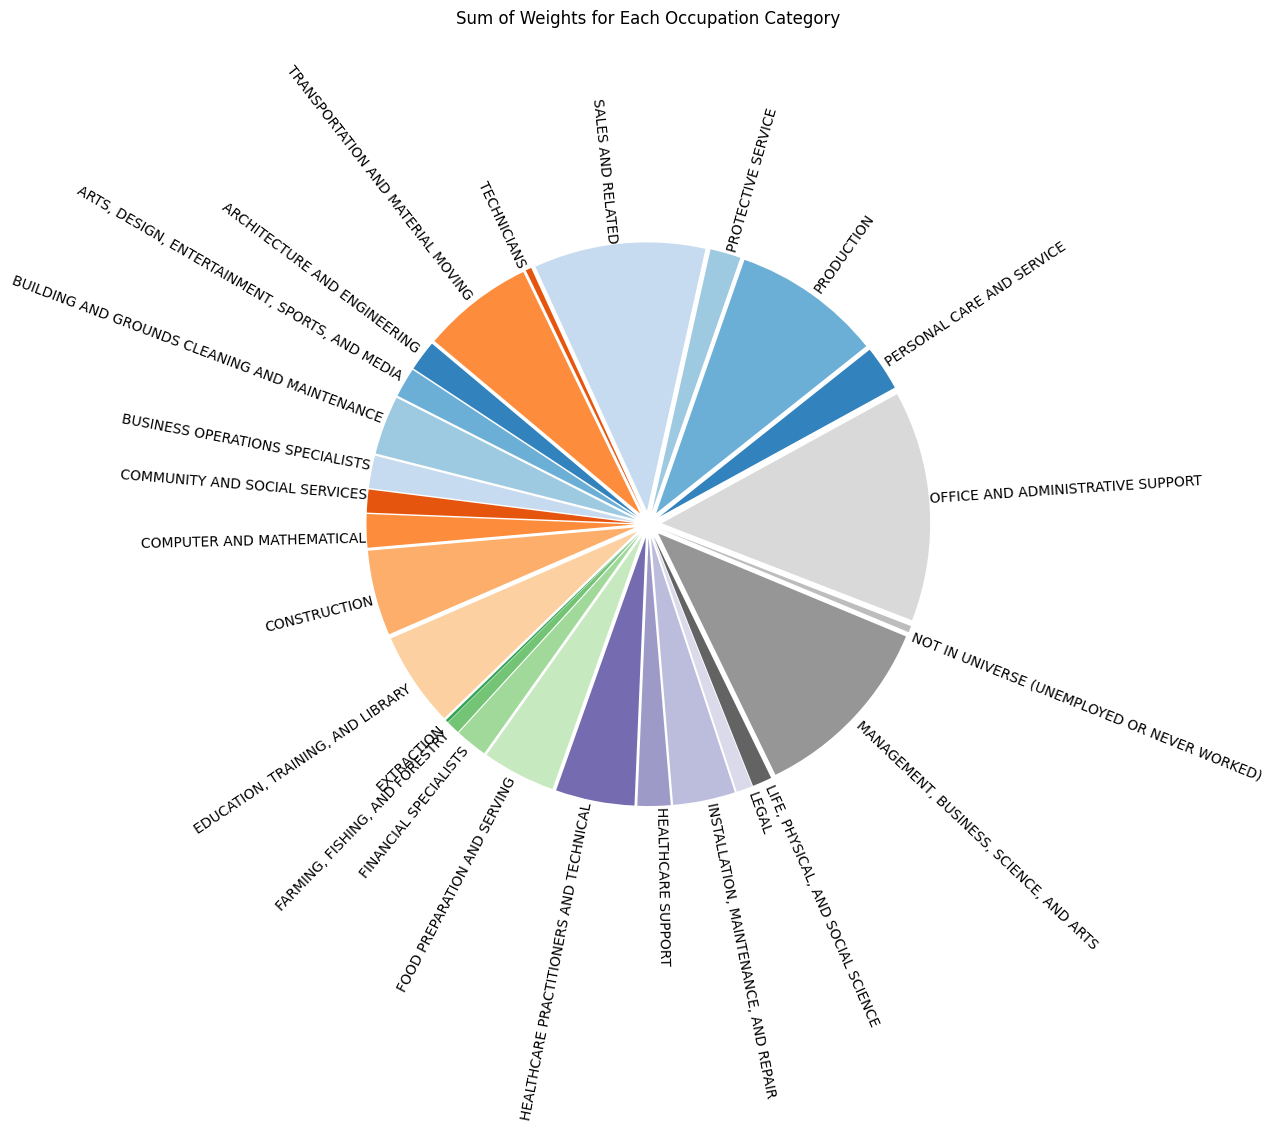

In [36]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(category_distribution_df['ASECWT_sum'], labels=category_distribution_df['Category'],
        rotatelabels=True, labeldistance=1, explode=[0.05] * len(category_distribution_df['Category']),
        startangle=140, colors=plt.cm.tab20c.colors
        )

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax.set_title('Sum of Weights for Each Occupation Category', y = 1.3)
plt.show()

----
### RACE
The number of race categories to choose from varied throughout the years. 
- until 2002, the nr of races ranged between 3 (white, negro, other) to 5 (white, black, American Indian/Eskimo/Aleut, Asian or Pacific Islander, other)
- starting 2003, more than one race could be reported, 21 nr of races
- 2013, 26 different races

Load the race titles corresponding to the race codes

In [37]:
race_codes = pd.read_csv(race_occ_path, sep='                 ', header=None)
race_codes.columns = ['RACE', 'race_title']

C:\Users\jputz\AppData\Local\Temp\ipykernel_11828\1532179367.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  race_codes = pd.read_csv(race_occ_path, sep='                 ', header=None)


In [38]:
def race_distribution(df: pd.DataFrame, race_col: str, race_codes: pd.DataFrame) -> pd.DataFrame:
    """ Calculate the total count and the weighted sum
        per race and return results in a dataframe
    """
    counts = df[race_col].value_counts().rename_axis(race_col).reset_index(name='total_counts')
    weights = df.groupby(race_col)['ASECWT'].sum().reset_index(race_col)

    # merge weights and counts per race
    dist = counts.merge(weights, on=race_col)

    # add race titles
    dist = dist.merge(race_codes, on=race_col, how='left')
    dist = dist.reindex(['RACE','race_title','total_counts','ASECWT'], axis=1)  

    return dist

In [39]:
def plot_race_distribution(df: pd.DataFrame, weighed: bool, legend_x: float = 1.15, legend_y: float =.9, title_y: float = 1.4):
    if weighed:
        dist_col = 'ASECWT'
        title = 'Weighed count per race'
    else: 
        dist_col = 'total_counts'
        title = 'Total count per race'

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(df[dist_col], #labels=race_counts["race_y"],
            rotatelabels=True, labeldistance=1, explode=[0.01] * len(df['race_title']),
            startangle=140, colors=plt.cm.tab20c.colors
            )

    ax.set_title(title, y = title_y)
    ax.legend(df['race_title'], ncol=2, loc='lower right', bbox_to_anchor=(legend_x, legend_y))
    plt.show()

In [40]:
data_df['RACE'].unique()

array([100, 200, 700, 300, 650, 651, 802, 805, 810, 652, 801, 803, 808,
       809, 820, 830, 813, 804, 811, 806, 807, 817, 815, 814, 812, 819,
       816, 818], dtype=int64)

In [41]:
race_dist = race_distribution(data_df, 'RACE', race_codes)

The table shows, that those race categories, which were offered a longer amount of time, also have higher counts. 

In [63]:
race_dist.sort_values(by='ASECWT', ascending=False)

,RACE,race_title,total_counts,ASECWT
0,100,White,3430818,5.579532e+09
1,200,Black,378930,7.072921e+08
2,651,Asian only,103591,1.743610e+08
3,650,Asian or Pacific Islander,35971,5.982170e+07
4,300,American Indian/Aleut/Eskimo,30776,3.891282e+07
5,700,"Other (single) race, n.e.c.",29196,3.676848e+07
6,802,White-American Indian,13825,1.919465e+07
8,801,White-Black,6196,1.258271e+07
7,652,Hawaiian/Pacific Islander only,8713,1.074986e+07
9,803,White-Asian,5575,8.577498e+06


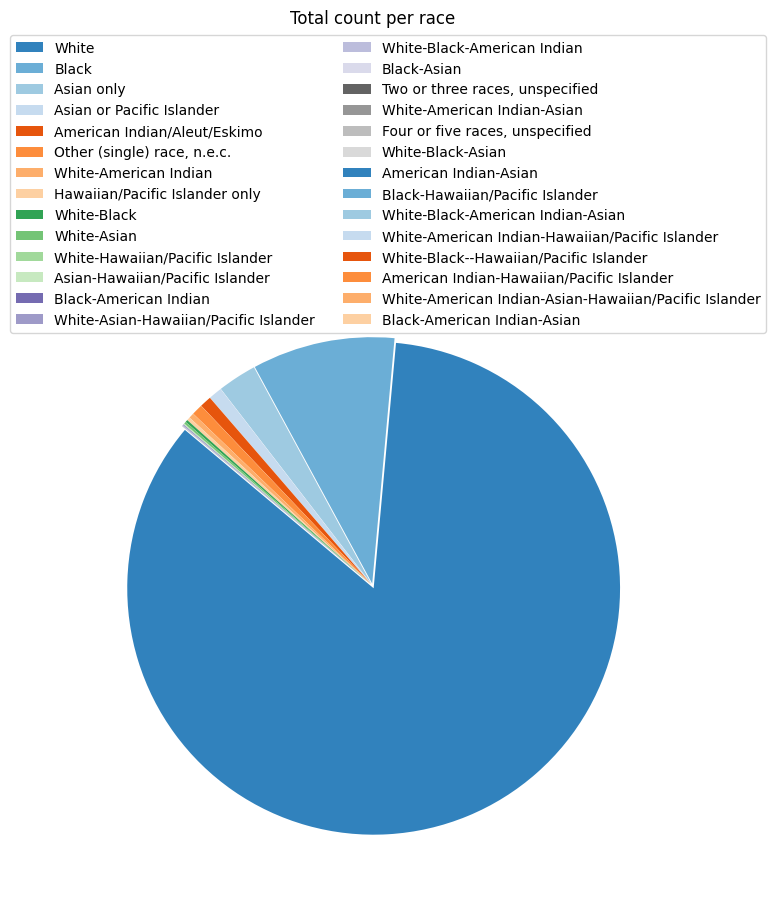

In [43]:
plot_race_distribution(race_dist, weighed=False)

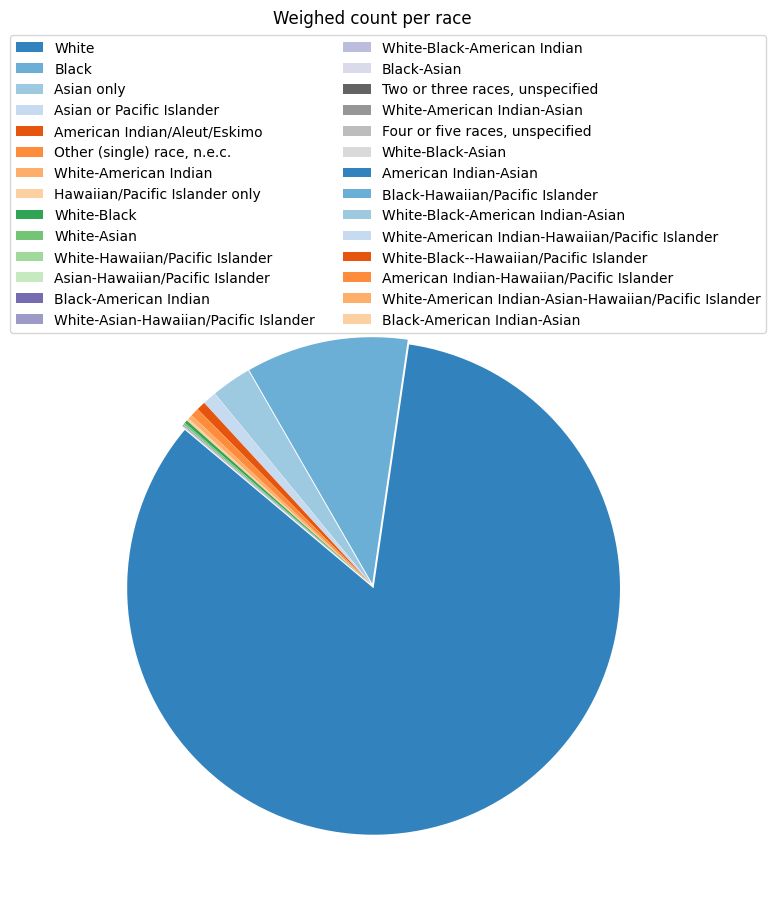

In [44]:
plot_race_distribution(race_dist, weighed=True)

The above plots show that the races are not evenly distributed since they represent the U.S. population. However, for analytical reasons, some adjustments are made. First, the races 801 - 819 are combined. Up to 2003 or 2013, those could not be chosen seperately anyways.

In [45]:
data_df_restructured = data_df.copy()
data_df_restructured['RACE'] = data_df['RACE'].replace(range(801, 820), 800)

In [46]:
restructured_dist = race_distribution(data_df_restructured, 'RACE', race_codes)

In [47]:
restructured_dist

,RACE,race_title,total_counts,ASECWT
0,100,White,3430818,5.579532e+09
1,200,Black,378930,7.072921e+08
2,651,Asian only,103591,1.743610e+08
3,650,Asian or Pacific Islander,35971,5.982170e+07
4,800,Two or more races,33897,4.979315e+07
5,300,American Indian/Aleut/Eskimo,30776,3.891282e+07
6,700,"Other (single) race, n.e.c.",29196,3.676848e+07
7,652,Hawaiian/Pacific Islander only,8713,1.074986e+07
8,820,"Two or three races, unspecified",210,1.720589e+05
9,830,"Four or five races, unspecified",146,9.678731e+04


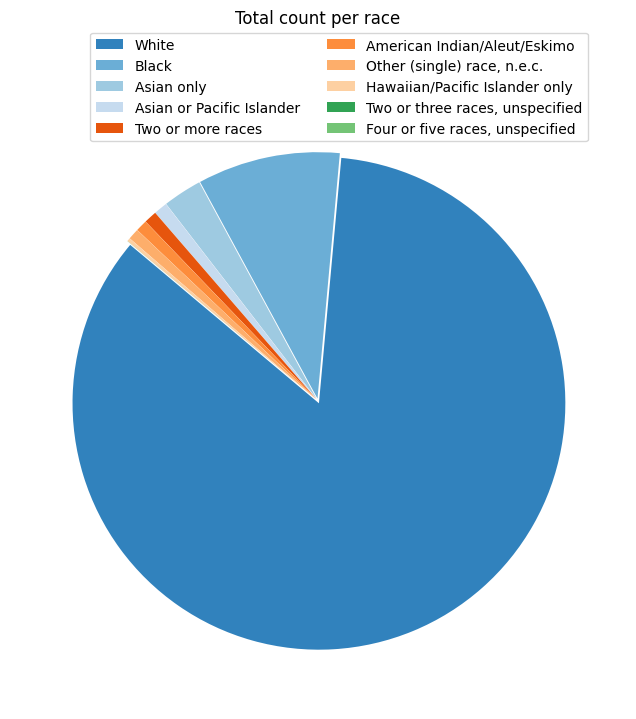

In [48]:
plot_race_distribution(restructured_dist, weighed=False, legend_x=.95, legend_y=.91, title_y = 1.1)

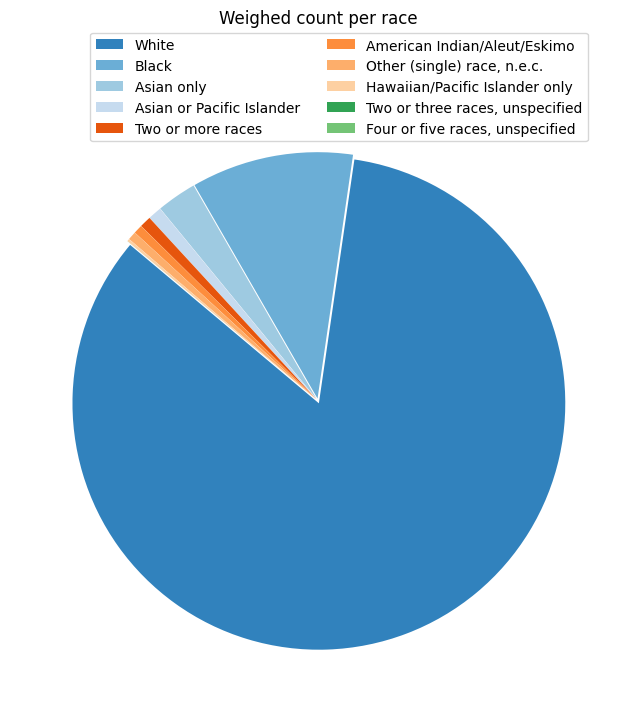

In [49]:
plot_race_distribution(restructured_dist, weighed=True, legend_x=.95, legend_y=.91, title_y = 1.1)

----
### Asian
This variable was introduced in 2013. <br>
Only people with code 651 (Asian Only) have a ASIAN code assigned, so this is already well labeled/grouped. This is because only respondents which chose Asian only could select a subgroup. Hence, no further adjustments are made.
99 = not in universe.

In [50]:
data_df['ASIAN'].unique()

array([nan, 99., 10., 50., 20., 70., 30., 60., 40.])

In [51]:
for code in data_df['ASIAN'].unique():
    codes = data_df[data_df['ASIAN']==code]['RACE'].unique()
    print(code, ': ', [race_codes[race_codes['RACE'] == r]['RACE'].item() for r in codes])

nan :  []
99.0 :  [100, 300, 200, 803, 802, 801, 652, 810, 804, 809, 817, 830, 815, 806, 805, 813, 814, 811, 820, 807, 812, 808, 819, 816, 818]
10.0 :  [651]
50.0 :  [651]
20.0 :  [651]
70.0 :  [651]
30.0 :  [651]
60.0 :  [651]
40.0 :  [651]


----
### Hispan

This variable also changed throughout the years. Before 2003, five to eight choices (including Hispanic, Negro, Black, German, ...) were available. This variable was introduced in 1976 only details about hispanic responses were preserved (all others labelled not hispanic). After 2003, respondents who answered they are 'Spanish, Hispanic or Latino' were asked more detailed questions.

- 100-109: Mexican
- 200: Puerto Rican
- 300: Cuban
- 400: Dominican
- 500: Salvadoran
- 901, 902: are not relevant (don't know, n/a)

In [52]:
data_df['HISPAN'].unique()

array([ nan,   0., 902., 200., 901., 300., 610., 600., 109., 100., 102.,
       103., 104., 108., 612., 611., 400., 500.])

In [53]:
for code in np.sort(data_df['HISPAN'].unique()):
    codes = data_df[data_df['HISPAN']==code]['RACE'].unique()
    print(code, ': ', [race_codes[race_codes['RACE'] == r]['RACE'].item() for r in codes])

0.0 :  [100, 200, 700, 300, 650, 651, 802, 805, 810, 652, 803, 808, 801, 809, 820, 830, 813, 804, 811, 806, 807, 814, 812, 817, 819, 816, 815, 818]
100.0 :  [100, 700, 802, 300, 200, 803, 652, 651, 801, 810, 804, 811, 814, 813, 805, 806, 809, 812, 808, 820, 819, 807, 817, 830, 815, 816]
102.0 :  [100, 700, 650, 300, 200]
103.0 :  [100, 200, 700]
104.0 :  [100, 650, 700, 300, 200]
108.0 :  [100, 200, 700, 300, 650]
109.0 :  [100, 700, 200]
200.0 :  [100, 700, 200, 650, 300, 801, 651, 802, 817, 652, 803, 809, 810, 804, 805, 830, 813, 820, 808, 806, 814, 812, 807, 815, 811, 816, 818, 819]
300.0 :  [100, 200, 700, 650, 651, 810, 300, 801, 652, 803, 811, 820, 802, 815, 804, 805, 830, 807, 819]
400.0 :  [100, 200, 300, 652, 651, 801, 805, 802, 810, 816, 806, 803]
500.0 :  [100, 801, 200, 810, 651, 300, 802, 803, 652, 805, 812, 804, 814]
600.0 :  [100, 700, 200, 300, 650, 803, 802, 813, 820, 810, 651, 652, 801, 809, 804, 805, 830, 811, 806, 812, 808, 817, 815]
610.0 :  [700, 100, 200, 650, 30

Attempt to restructure the races (not used)

In [54]:
data_df_restructured.loc[data_df_restructured['HISPAN'].isin([100, 102, 103, 104, 108, 109]), 'RACE'] = 910
data_df_restructured.loc[data_df_restructured['HISPAN'].isin([200]), 'RACE'] = 920
data_df_restructured.loc[data_df_restructured['HISPAN'].isin([300]), 'RACE'] = 930
data_df_restructured.loc[data_df_restructured['HISPAN'].isin([400]), 'RACE'] = 940
data_df_restructured.loc[data_df_restructured['HISPAN'].isin([500]), 'RACE'] = 950
data_df_restructured.loc[data_df_restructured['HISPAN'].isin([600, 610, 611, 612]), 'RACE'] = 960

In [55]:
data_df_restructured['RACE'].unique()

array([100, 200, 700, 920, 930, 960, 910, 300, 650, 651, 800, 652, 820,
       830, 940, 950], dtype=int64)

In [56]:
race_codes = pd.read_csv(r'../../data/race_codes_simplified.txt', sep='                 ', header=None)
race_codes.columns = ['RACE', 'race_title']

C:\Users\jputz\AppData\Local\Temp\ipykernel_11828\1885069617.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  race_codes = pd.read_csv(r'../../data/race_codes_simplified.txt', sep='                 ', header=None)


In [57]:
restructured_dist = race_distribution(data_df_restructured, 'RACE', race_codes)

In [58]:
restructured_dist

,RACE,race_title,total_counts,ASECWT
0,100,White,2971148,4.922418e+09
1,200,Black,366271,6.825707e+08
2,910,Mexican,296645,4.411930e+08
3,960,Other Hispanic,117686,1.571528e+08
4,651,Asian only,101389,1.699786e+08
5,920,Puerto Rican,43388,6.078599e+07
6,650,Asian or Pacific Islander,35228,5.889517e+07
7,800,Two or more races,28131,3.871807e+07
8,700,"Other (single) race, n.e.c.",25832,3.339605e+07
9,300,American Indian/Aleut/Eskimo,24784,2.781921e+07


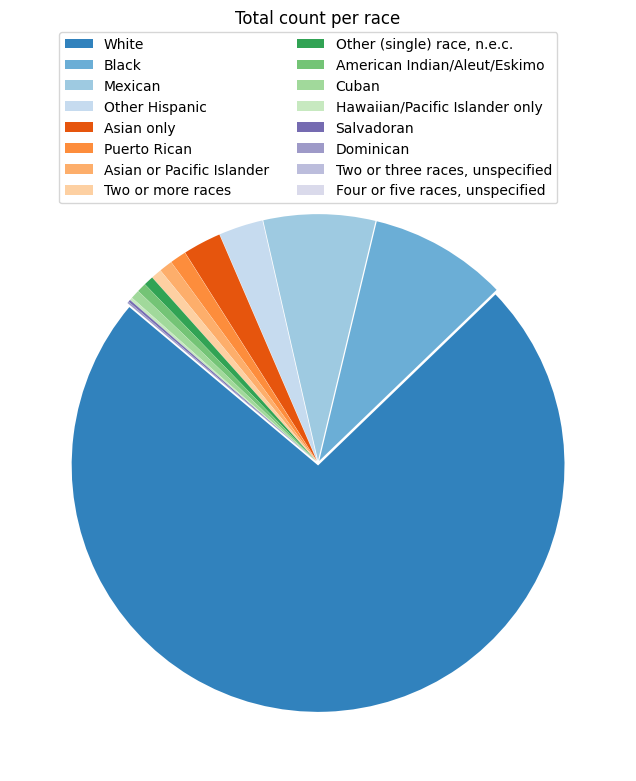

In [59]:
plot_race_distribution(restructured_dist, weighed=False, legend_x=.9, legend_y=.91, title_y=1.2)

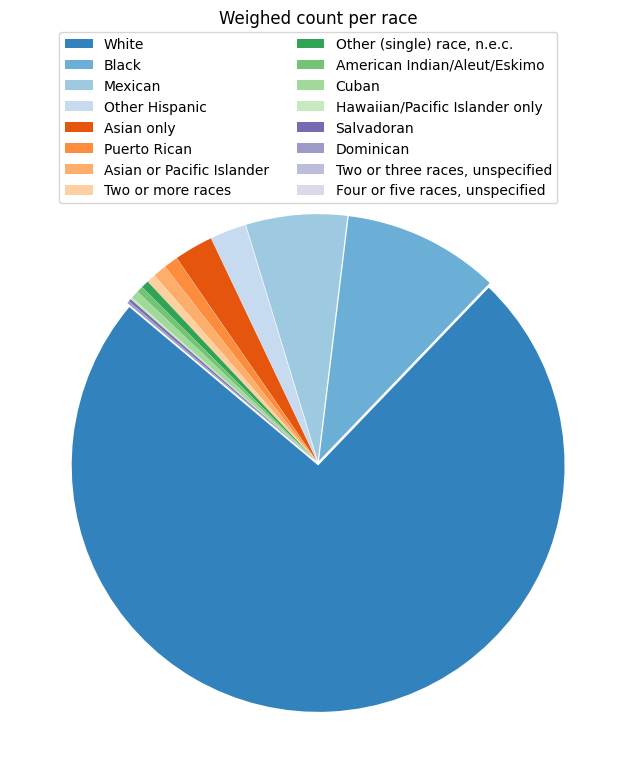

In [60]:
plot_race_distribution(restructured_dist, weighed=True, legend_x=.9, legend_y=.91, title_y=1.2)

## Save dataframe

In [61]:
data_df.to_csv('../../data/cps_clean_original_races.csv', index=False, sep=';')

In [62]:
data_df_restructured.to_csv('../../data/cps_clean_restructured_races.csv', index=False, sep=';')